# K - Nearest Neighbors Algorithm & Cross Validation

KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) using mathematics to calculate the distance between points on a graph. The straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

### The basic KNN algorithm is :-

1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
    - Calculate the distance between the query example and the current example from the data.
    - Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

We will implement the KNN algorithm from the Scikit Learn package available for the python environment.<br>
Let us import the necessary packages and librabries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

## The Dataset

Dataset contains Social media ads describing users, whether users have purchased a product by clicking on the advertisements shown to them.

Now let us import the dataset.

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As we can see that we will be using Age and Estimated Salary as input to train on and predict the output that if a user fitting the given demographic will purchase the product or not.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Here we have split the dataset into training and test sets using a pre-defined function. We have split the data as 75% training set and 25% test set.

Now we scale the data as there is inconsistency in size. The <b>age</b> of the user and <b>product purchased</b> flag are very small in magnitude as compared to <b>Estimated salary</b>.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we import KNN algorithm library from the scikit learn package and define the <b>number of neighbors</b> to use and choose whether to use <b>'Euclidean Distance'</b> or <b>'Manhattan Distance'</b> which is defined by parameter <b>p</b> in the KNN function. 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [79]:
cv_results = cross_validate(classifier, X_train, y_train, cv=5)
cv_results

{'fit_time': array([0.00106883, 0.00100756, 0.0023067 , 0.0010314 , 0.        ]),
 'score_time': array([0.0088141 , 0.00343084, 0.00294685, 0.00393367, 0.00330639]),
 'test_score': array([0.88333333, 0.85      , 0.85      , 0.9       , 0.95      ])}

In [80]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []
k_scores1 = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append([k,scores.mean()])
    k_scores1.append(scores.mean())
    


print(k_scores)

[[1, 0.8533333333333333], [2, 0.8433333333333334], [3, 0.89], [4, 0.8733333333333334], [5, 0.9066666666666666], [6, 0.8966666666666667], [7, 0.9066666666666668], [8, 0.9066666666666666], [9, 0.9066666666666666], [10, 0.9033333333333333], [11, 0.9099999999999999], [12, 0.9], [13, 0.8966666666666667], [14, 0.8966666666666667], [15, 0.8966666666666667], [16, 0.89], [17, 0.89], [18, 0.8866666666666667], [19, 0.8933333333333333], [20, 0.8933333333333333], [21, 0.89], [22, 0.8933333333333333], [23, 0.89], [24, 0.8966666666666667], [25, 0.8933333333333333], [26, 0.8933333333333333], [27, 0.8933333333333333], [28, 0.8966666666666667], [29, 0.8966666666666667], [30, 0.8966666666666667]]


In [81]:
max(k_scores1)

0.9099999999999999

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


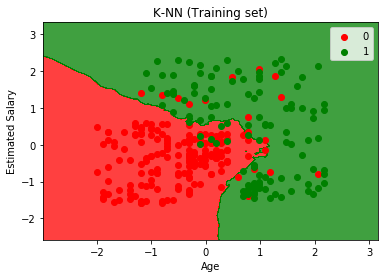

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


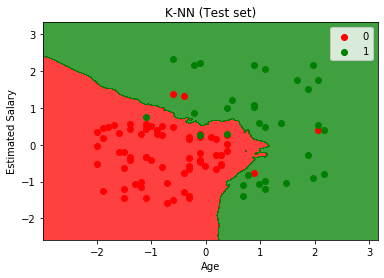

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()